In [80]:
def get_tree_percent(x):
    return x['geometry_tree'].intersection(x['geometry']).area/x['geometry'].area
#tract_taz['tract_pct'] = tract_taz[['geometry','geometry_taz']].apply(get_percent, axis = 1)


In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import gdal
import rasterio

In [2]:
boundaryDir = r'C:\Users\hannah.carson\Documents\SAB\URBAN TREE\boundaries'

In [3]:
muni = gpd.read_file(os.path.join(boundaryDir,'MUNICIPAL_BOUNDARIES.shp'))

In [15]:
delmar = gpd.read_file(os.path.join(boundaryDir,"DEL_MAR.shp"))
#parcel = gpd.read_file(os.path.join(boundaryDir,'PARCELS.shp'))
#tracts = gpd.read_file(os.path.join(boundaryDir,'CENSUS_TRACTS_2010.shp'))
#muni = gpd.read_file(os.path.join(boundaryDir,'MUNICIPAL_BOUNDARIES.shp'))

In [11]:
landuse = gpd.read_file(os.path.join(boundaryDir,'LAND_USE_2013.shp'))


In [2]:
dmtrees = gpd.read_file('delmar_trees.shp')

In [10]:
dmtrees.iloc[0].geometry.get_coordinates()

AttributeError: 'Polygon' object has no attribute 'get_coordinates'

In [22]:
for file in [parcel, tracts,muni,landuse]:
    file = file.to_crs(delmar.crs)
    file = file[file.intersects(delmar.unary_union)]

In [17]:
parcel.columns

Index(['APN', 'APN_8', 'PARCELID', 'OWN_NAME1', 'OWN_NAME2', 'OWN_NAME3',
       'FRACTINT', 'OWN_ADDR1', 'OWN_ADDR2', 'OWN_ADDR3', 'OWN_ADDR4',
       'OWN_ZIP', 'SITUS_JURI', 'SITUS_STRE', 'SITUS_SUFF', 'SITUS_POST',
       'SITUS_PRE_', 'SITUS_ADDR', 'SITUS_FRAC', 'SITUS_BUIL', 'SITUS_SUIT',
       'LEGLDESC', 'ASR_LAND', 'ASR_IMPR', 'ASR_TOTAL', 'DOCTYPE', 'DOCNMBR',
       'DOCDATE', 'ACREAGE', 'TAXSTAT', 'OWNEROCC', 'TRANUM', 'ASR_ZONE',
       'ASR_LANDUS', 'UNITQTY', 'SUBMAP', 'SUBNAME', 'NUCLEUS_ZO',
       'NUCLEUS_US', 'SITUS_COMM', 'YEAR_EFFEC', 'TOTAL_LVG_', 'BEDROOMS',
       'BATHS', 'ADDITION_A', 'GARAGE_CON', 'GARAGE_STA', 'CARPORT_ST', 'POOL',
       'PAR_VIEW', 'USABLE_SQ_', 'QUAL_CLASS', 'NUCLEUS_SI', 'NUCLEUS__1',
       'NUCLEUS__2', 'SITUS_ZIP', 'x_coord', 'y_coord', 'overlay_ju',
       'sub_type', 'multi', 'SHAPE_STAr', 'SHAPE_STLe', 'geometry'],
      dtype='object')

In [25]:
print(len(parcel),len(parcel.PARCELID.unique()))

5094 1898


In [24]:
parcel = parcel[parcel.intersects(delmar.unary_union)]

In [26]:
parcel.to_file(filename = os.path.join(boundaryDir,'dm_parcel.shp'),driver = 'ESRI Shapefile')


In [35]:
multiparcel = parcel.groupby('PARCELID').count()
multiparcel[multiparcel.APN == multiparcel.APN.max()]

,APN,APN_8,OWN_NAME1,OWN_NAME2,OWN_NAME3,FRACTINT,OWN_ADDR1,OWN_ADDR2,OWN_ADDR3,OWN_ADDR4,...,NUCLEUS__2,SITUS_ZIP,x_coord,y_coord,overlay_ju,sub_type,multi,SHAPE_STAr,SHAPE_STLe,geometry
PARCELID,,,,,,,,,,,,,,,,,,,,,
1565892,612,612,612,52,7,612,612,612,45,0,...,0,612,612,612,612,612,612,612,612,612


In [37]:
trees = gpd.read_file('delmar_trees_from_anne.shp')

In [78]:
tracts = tracts.to_crs(delmar.crs)
dm_tracts = tracts[tracts.intersects(delmar.unary_union)]

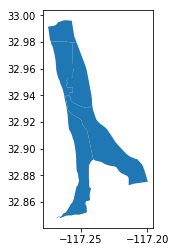

In [79]:
dm_tracts.plot()

In [77]:
len(dm_tracts)

0

## Process Raster Data

In [4]:
# rasterio.open??
dmt = rasterio.open('nlcd_2016_treecanopy_2019_08_31_clip.img', crs = 'epsg:4326')

In [5]:
dmt.descriptions

('Red', 'Green', 'Blue', 'Infrared')

In [6]:
dmt.bounds

BoundingBox(left=-13054711.421927178, bottom=3886998.3187366156, right=-13052813.421927178, top=3892724.3187366156)

In [7]:
dmt.count


4

In [8]:
red = dmt.read(1)

In [9]:
red

array([[256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       ...,
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256],
       [256, 256, 256, ..., 256, 256, 256]], dtype=uint16)

In [10]:
green = dmt.read(2)

In [11]:
blue = dmt.read(3)


In [12]:
ir = dmt.read(4)

In [13]:
dmt.lnglat()

(-117.26394298882241, 32.95898610084477)

In [14]:
dmt.crs# = rasterio.crs.CRS.from_epsg(4326)


CRS.from_dict(init='epsg:3857')

In [16]:
delmar = delmar.to_crs({'init':'epsg:3857'})

In [17]:
dmt[dmt.intersects(delmar.unary_union)]

AttributeError: 'DatasetReader' object has no attribute 'intersects'